![hackio](https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_celeste@4x.png?raw=true)


# Laboratorio A/B Testing No Paramétricos

**Aerolínea:** 
Alas del Mundo

**Descripción de la Aerolínea**

Alas del Mundo es una aerolínea internacional que opera una amplia red de rutas a nivel mundial. La compañía se enorgullece de ofrecer vuelos cómodos y asequibles a una variedad de destinos, atrayendo a una diversa gama de clientes.

**Objetivo del Análisis**

El objetivo de este ejercicio es determinar si existe una diferencia significativa en el número de vuelos reservados entre pasajeros con diferentes niveles educativos y si existe una diferencia significativa entre el género de sus clientes y su salario. La aerolínea desea entender mejor a sus clientes para poder personalizar sus campañas de marketing y mejorar sus estrategias de ventas.

**Set de datos**

El conjunto de datos *alas_del_mundo.csv* contiene información sobre clientes de la aerolínea Alas del Mundo. A continuación, tenemos una descripción de lo que nos podemos encontrar en el conjunto de datos:

- **Loyalty Number**: Número de registro de cada uno de los clientes.

- **Province**: Provincia de residencia del cliente.

- **City**: Ciudad de residencia del cliente.

- **Gender**: Género con el que se identifica el cliente.

- **Education**: Nivel educativo del cliente.

- **Salary**: Salario anual del cliente.

- **Loyalty Card**: Nivel que tiene el cliente dentro del programa de fidelización de la aerolínea.

- **CLV**: Valor total del cliente para la aerolínea a lo largo de toda su relación.

- **Enrollment Type**: Forma de registro del cliente a la aerolínea.

- **Enrollment Year**: Año de inscripción.

- **Enrollment Month**: Mes de inscripción. 

- **Year**: Año en el que se realizan los vuelos.

- **Month**: Mes en el que se realizan los vuelos.

- **Flights Booked**: Vuelos reservados por el cliente en un mes y año concretos.

- **Distance**: Distancia de vuelo del cliente en un mes y año concreto

- **Points Accumulated**: Puntos acumulados por el cliente en un mes y año concretos.

## Ejercicio 1:

Antes de realizar el experimento A/B y formular hipótesis, es fundamental comprender a fondo el conjunto de datos y sus características. Para lograr esto, debes llevar a cabo un análisis exploratorio detallado de los datos (EDA), con el fin de familiarizarte con ellos y entender la información disponible.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sys
import os

sys.path.append(os.path.abspath('../'))
from src import funciones_abtesting as fab
from src import soporte_combinatoria as sc

In [2]:
df = pd.read_csv("../datos/alas_del_mundo.csv")
df.head(2)

,Loyalty Number,Province,City,Gender,Education,Salary,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Year,Month,Flights Booked,Distance,Points Accumulated
0,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,1,0,0,0.0
1,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,2,3,2823,282.0


In [3]:
fab.exploracion_datos(df, "Education")


El número de datos es 405624 y el de columnas es 16

Los duplicados que tenemos en el conjunto de datos son: 1864

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
Salary,25.312112



Los tipos de las columnas son:


,tipo_dato
Loyalty Number,int64
Province,object
City,object
Gender,object
Education,object
Salary,float64
Loyalty Card,object
CLV,float64
Enrollment Type,object
Enrollment Year,int64



Los valores que tenemos para las columnas categóricas son: 
La columna Province tiene las siguientes valore únicos:


,count
Province,
Ontario,130896
British Columbia,106848
Quebec,79968
Alberta,23400
Manitoba,15984


La columna City tiene las siguientes valore únicos:


,count
City,
Toronto,81096
Vancouver,62520
Montreal,49920
Winnipeg,15984
Whistler,14040


La columna Gender tiene las siguientes valore únicos:


,count
Gender,
Female,203640
Male,201984


La columna Education tiene las siguientes valore únicos:


,count
Education,
Bachelor,253752
College,102672
High School or Below,19008
Doctor,17856
Master,12336


La columna Loyalty Card tiene las siguientes valore únicos:


,count
Loyalty Card,
Star,184224
Nova,137568
Aurora,83832


La columna Enrollment Type tiene las siguientes valore únicos:


,count
Enrollment Type,
Standard,382200
2018 Promotion,23424




Los principales estadísticos de las columnas categóricas para el Bachelor son: 


,count,unique,top,freq
Province,253752,11,Ontario,81192
City,253752,29,Toronto,51120
Gender,253752,2,Female,127872
Education,253752,1,Bachelor,253752
Loyalty Card,253752,3,Star,108336
Enrollment Type,253752,2,Standard,238488



Los principales estadísticos de las columnas numéricas para el Bachelor son: 


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,253752.0,548236.928024,260404.939311,100018.00,323424.00,548238.00,772484.00,999986.00
Salary,253752.0,72476.211860,17205.712889,-58486.00,58711.00,71971.00,85848.00,105563.00
CLV,253752.0,8215.816801,7061.053007,2255.31,4150.84,5867.13,9082.83,83325.38
Enrollment Year,253752.0,2015.263407,1.988988,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,253752.0,6.649295,3.381761,1.00,4.00,7.00,10.00,12.00
Year,253752.0,2017.500000,0.500001,2017.00,2017.00,2017.50,2018.00,2018.00
Month,253752.0,6.500000,3.452059,1.00,3.75,6.50,9.25,12.00
Flights Booked,253752.0,4.091093,5.216995,0.00,0.00,1.00,8.00,21.00
Distance,253752.0,1202.803284,1432.310025,0.00,0.00,450.00,2326.00,6262.00
Points Accumulated,253752.0,123.156014,146.619868,0.00,0.00,46.00,238.00,675.00




Los principales estadísticos de las columnas categóricas para el College son: 


,count,unique,top,freq
Province,102672,11,Ontario,33624
City,102672,29,Toronto,20280
Gender,102672,2,Male,52104
Education,102672,1,College,102672
Loyalty Card,102672,3,Star,51072
Enrollment Type,102672,2,Standard,96936



Los principales estadísticos de las columnas numéricas para el College son: 


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,102672.0,549515.872370,255302.043587,100102.00,331184.00,547637.00,765252.00,999982.00
Salary,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CLV,102672.0,7575.448806,6546.384983,1898.01,3744.58,5568.95,8489.84,74228.52
Enrollment Year,102672.0,2015.270220,1.962468,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,102672.0,6.666199,3.434345,1.00,4.00,7.00,10.00,12.00
Year,102672.0,2017.500000,0.500002,2017.00,2017.00,2017.50,2018.00,2018.00
Month,102672.0,6.500000,3.452069,1.00,3.75,6.50,9.25,12.00
Flights Booked,102672.0,4.153012,5.242136,0.00,0.00,1.00,8.00,21.00
Distance,102672.0,1215.317672,1432.353262,0.00,0.00,531.00,2345.00,6293.00
Points Accumulated,102672.0,124.229162,146.380332,0.00,0.00,54.00,240.00,655.50




Los principales estadísticos de las columnas categóricas para el Master son: 


,count,unique,top,freq
Province,12336,11,Ontario,4128
City,12336,29,Toronto,2496
Gender,12336,2,Female,6456
Education,12336,1,Master,12336
Loyalty Card,12336,3,Star,6696
Enrollment Type,12336,2,Standard,11880



Los principales estadísticos de las columnas numéricas para el Master son: 


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,12336.0,548875.406615,264617.066194,100644.00,315869.00,548212.00,781463.00,998072.00
Salary,12336.0,103767.494163,17514.343573,56414.00,88120.00,105487.00,118530.00,133080.00
CLV,12336.0,7524.240117,5924.737304,2174.11,3600.93,5205.88,10083.49,30591.61
Enrollment Year,12336.0,2015.233463,1.943833,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,12336.0,6.826848,3.389750,1.00,4.00,7.00,10.00,12.00
Year,12336.0,2017.500000,0.500020,2017.00,2017.00,2017.50,2018.00,2018.00
Month,12336.0,6.500000,3.452192,1.00,3.75,6.50,9.25,12.00
Flights Booked,12336.0,4.184014,5.210294,0.00,0.00,1.00,8.00,21.00
Distance,12336.0,1233.865678,1436.885423,0.00,0.00,627.00,2364.25,6180.00
Points Accumulated,12336.0,126.005763,146.745494,0.00,0.00,64.00,241.94,625.50




Los principales estadísticos de las columnas categóricas para el High School or Below son: 


,count,unique,top,freq
Province,19008,11,Ontario,6312
City,19008,29,Toronto,3888
Gender,19008,2,Female,9720
Education,19008,1,High School or Below,19008
Loyalty Card,19008,3,Star,9672
Enrollment Type,19008,2,Standard,17808



Los principales estadísticos de las columnas numéricas para el High School or Below son: 


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,19008.0,558216.804293,258662.751947,101148.00,332180.75,561366.00,782612.75,994541.0
Salary,19008.0,60986.544192,12723.916043,-49830.00,52044.75,61806.00,71344.00,93875.0
CLV,19008.0,7722.940328,6657.946709,2272.34,3707.28,5269.28,8991.98,43290.5
Enrollment Year,19008.0,2015.193182,1.984666,2012.00,2013.00,2015.00,2017.00,2018.0
Enrollment Month,19008.0,6.609848,3.457341,1.00,4.00,7.00,10.00,12.0
Year,19008.0,2017.500000,0.500013,2017.00,2017.00,2017.50,2018.00,2018.0
Month,19008.0,6.500000,3.452143,1.00,3.75,6.50,9.25,12.0
Flights Booked,19008.0,4.155777,5.234551,0.00,0.00,1.00,8.00,21.0
Distance,19008.0,1225.585543,1435.875594,0.00,0.00,580.00,2363.25,6032.0
Points Accumulated,19008.0,125.176770,146.493283,0.00,0.00,59.50,242.00,661.5




Los principales estadísticos de las columnas categóricas para el Doctor son: 


,count,unique,top,freq
Province,17856,11,Ontario,5640
City,17856,29,Toronto,3312
Gender,17856,2,Female,9024
Education,17856,1,Doctor,17856
Loyalty Card,17856,3,Star,8448
Enrollment Type,17856,2,Standard,17088



Los principales estadísticos de las columnas numéricas para el Doctor son: 


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,17856.0,570729.143817,253980.381625,101594.00,359104.5000,581403.50,785276.250,999911.00
Salary,17856.0,178335.439516,70307.642502,48109.00,124343.7500,180440.00,235069.250,407228.00
CLV,17856.0,7815.538978,6466.157567,2119.89,4056.4125,5619.19,8580.735,58207.13
Enrollment Year,17856.0,2015.072581,1.949028,2012.00,2013.0000,2015.00,2017.000,2018.00
Enrollment Month,17856.0,6.896505,3.389085,1.00,4.0000,7.00,10.000,12.00
Year,17856.0,2017.500000,0.500014,2017.00,2017.0000,2017.50,2018.000,2018.00
Month,17856.0,6.500000,3.452149,1.00,3.7500,6.50,9.250,12.00
Flights Booked,17856.0,4.146281,5.250093,0.00,0.0000,1.00,8.000,21.00
Distance,17856.0,1223.176131,1443.825996,0.00,0.0000,534.50,2368.000,6293.00
Points Accumulated,17856.0,125.057556,147.555733,0.00,0.0000,54.00,241.000,676.50


Lo primero de todo sería eliminar todos los duplicados:

In [4]:
df.drop_duplicates(inplace=True)

Como hemos visto hay bastantes nulos en la columna de salario que tenemos que tratar:

In [5]:
df[df["Salary"].isna()]["Education"].value_counts()

Education
College    102260
Name: count, dtype: int64

In [6]:
df[df["Education"]=="College"]["Salary"].unique()

array([nan])

Por lo visto para las personas con este nivel educativo no se han recabado ningún tipo de datos sobre sus salarios. Por lo que para el estudio sobre salario y género debemos filtrar los datos y quitar a este grupo para no tener nulos en la columna salario. No podemos sustituir estos nulos por 0 pues estaríamos falseando los datos ya que afectaría a los cálculos y no tenemos ninguna evidencia de que este datos sea 0, por lo que simplemente los quitamos. 

Además, observamos que en la columna salario alguna veces aparecen en negativo:

In [7]:
df[df["Salary"]<0].shape

(480, 16)

Tenemos 480 datos para los cuales el salario es negativo para varios de sus clientes, lo cual no teiene sentido que un salario sea negativo. Puede ser que haya habido un fallo a la hora de recabar esta información, sin embargo, al ser solo 480 datos en una muestra de más de 400.000 lo mejor sería quitar esta fila y no contaminar los resultados.

Para hacer el segundo estudio de salario y genero nos quedaremos con el dataframe donde en la columna salario no hay nulos ni negativos.

In [8]:
df_test2 = df[(df["Education"]!="College") & (df["Salary"]>0)]

## Ejercicio 2:
Determina si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

 Pasos a seguir:

   - Definición de la hipótesis.
   - Prueba de hipótesis
   - Análisis de resultados
   - Conclusiones
   


### Hipótesis:

H0 : No existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

H1: Sí existe dicha diferencia.

### Análisis

Comprobamos si tenemos que aplicar un test paramétrico o no paramétrico.

Comprobamos la normalidad:

In [9]:
fab.test_normalidad(df, "Education", "Flights Booked")

Según el test de Kolmogorov se han obtenido los siguientes resultados:

Para el grupo Bachelor hemos obtenido:
    0 de los valores SÍ siguen una distribución normal.
    5 de los valores NO siguen una distribución normal.
-----------------------------------------------------

Para el grupo College hemos obtenido:
    0 de los valores SÍ siguen una distribución normal.
    5 de los valores NO siguen una distribución normal.
-----------------------------------------------------

Para el grupo Doctor hemos obtenido:
    0 de los valores SÍ siguen una distribución normal.
    5 de los valores NO siguen una distribución normal.
-----------------------------------------------------

Para el grupo High School or Below hemos obtenido:
    0 de los valores SÍ siguen una distribución normal.
    5 de los valores NO siguen una distribución normal.
-----------------------------------------------------

Para el grupo Master hemos obtenido:
    0 de los valores SÍ siguen una distribución normal.
  

Como no siguen una distribución normal aplicaremos un test no paramétrico. Tenemos 5 grupos de educación por lo que aplicaremos el test de Kruskal.

In [10]:
valores = fab.crear_df_grupos(df, "Education", "Flights Booked")
fab.elegir_test(valores)

Ejecutando Kruskal...
El p-valor es 0.0015225470219889365, sí hay diferencías significativas entre los grupos.


Observamos que sí que hay diferencias signidicativas entre los grupos, observemos los grupos:

<Axes: xlabel='Education', ylabel='Flights Booked'>

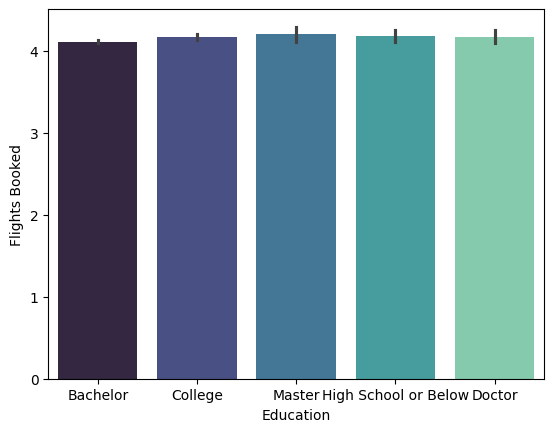

In [11]:
sns.barplot(df, x="Education", y="Flights Booked", palette='mako')

A simple vista es dificil asegurar entre que grupos hay diferencias significativas, comprobémoslo con el test de Mann-Whitney para cada par.

In [12]:
lista_combinaciones = sc.combinaciones(df["Education"].unique(), 2)[0]

for combinacion in lista_combinaciones:
    lista_valores = []
    print("--------")
    for valor in combinacion:
        globals()[valor.lower()] = df[df["Education"]==valor]["Flights Booked"]
        lista_valores.append(valor)
    print(f"Para los grupos {lista_valores}")
    fab.elegir_test(lista_valores)
    


--------
Para los grupos ['Bachelor', 'College']
Ejecutando Mann-Whitney...
El p-valor es 0.002278100128804696, sí hay diferencías significativas entre los grupos.
--------
Para los grupos ['Bachelor', 'Master']
Ejecutando Mann-Whitney...
El p-valor es 0.014056962299193064, sí hay diferencías significativas entre los grupos.
--------
Para los grupos ['Bachelor', 'High School or Below']
Ejecutando Mann-Whitney...
El p-valor es 0.036000727159277525, sí hay diferencías significativas entre los grupos.
--------
Para los grupos ['Bachelor', 'Doctor']
Ejecutando Mann-Whitney...
El p-valor es 0.0946, NO hay diferencías significativas entre los grupos.
--------
Para los grupos ['College', 'Master']
Ejecutando Mann-Whitney...
El p-valor es 0.2384, NO hay diferencías significativas entre los grupos.
--------
Para los grupos ['College', 'High School or Below']
Ejecutando Mann-Whitney...
El p-valor es 0.5757, NO hay diferencías significativas entre los grupos.
--------
Para los grupos ['College', 

Por lo tanto hemos visto que los grupos entre los cuales hay diferencias significativas son: 
- 'Bachelor', 'College'
- 'Bachelor', 'Master'
- 'Bachelor', 'High School or Below'

Hemos observado que las medianas de todos los grupos es 1, mientras que para las medias vemos que la de Bachelor es ligeramente menor que para el resto de grupos por lo que el número de vuelos reservados por los Bachelor es ligeramente significativamente menor que para los de College, Master y High School or Below.

## Ejercicio 3:
Determina si existe una diferencia significativa en el salario de los clientes en función del género de los mismos.

Pasos a seguir:
   - Definición de la hipótesis.
   - Prueba de hipótesis
   - Análisis de resultados
   - Conclusiones

### Hipótesis
- H0 : No existe una diferencia significativa en el salario de los clientes en función del género de los mismos.
- H1 : Sí existe dicha diferencia.

### Análisis

Comprobamos si tenemos que aplicar un test paramétrico o no paramétrico.

Comprobamos la normalidad:

In [13]:
fab.test_normalidad(df_test2, "Gender", "Salary")

Según el test de Kolmogorov se han obtenido los siguientes resultados:

Para el grupo Female hemos obtenido:
    0 de los valores SÍ siguen una distribución normal.
    5 de los valores NO siguen una distribución normal.
-----------------------------------------------------

Para el grupo Male hemos obtenido:
    0 de los valores SÍ siguen una distribución normal.
    5 de los valores NO siguen una distribución normal.
-----------------------------------------------------



Como no siguen una distribución normal aplicaremos un test no paramétrico. Tenemos 2 grupos independientes por lo que aplicamos Mann-Whitney.

In [14]:
valores = fab.crear_df_grupos(df_test2, "Gender", "Salary")
fab.elegir_test(valores, dependencia=False)

Ejecutando Mann-Whitney...
El p-valor es 1.732156714228487e-05, sí hay diferencías significativas entre los grupos.


In [ ]:
#stats.mannwhitneyu(x=df_test2[df_test2["Gender"]=="Female"]["Salary"],y=df_test2[df_test2["Gender"]=="Male"]["Salary"], alternative='less')

MannwhitneyuResult(statistic=np.float64(11427700818.0), pvalue=np.float64(0.9999913392180673))

(79000.0, 80000.0)

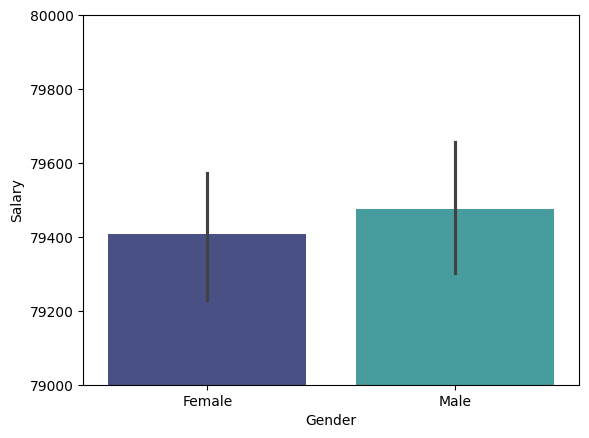

In [15]:
sns.barplot(df_test2, x="Gender", y="Salary", palette='mako')
plt.ylim(79000, 80000)

<Axes: xlabel='Gender', ylabel='Salary'>

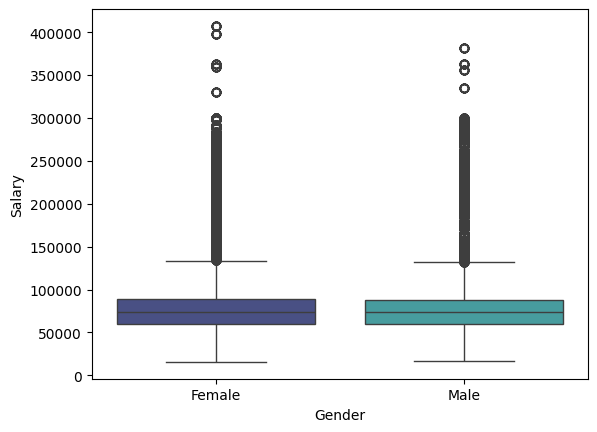

In [16]:
sns.boxplot(df_test2, x="Gender", y="Salary", palette='mako')

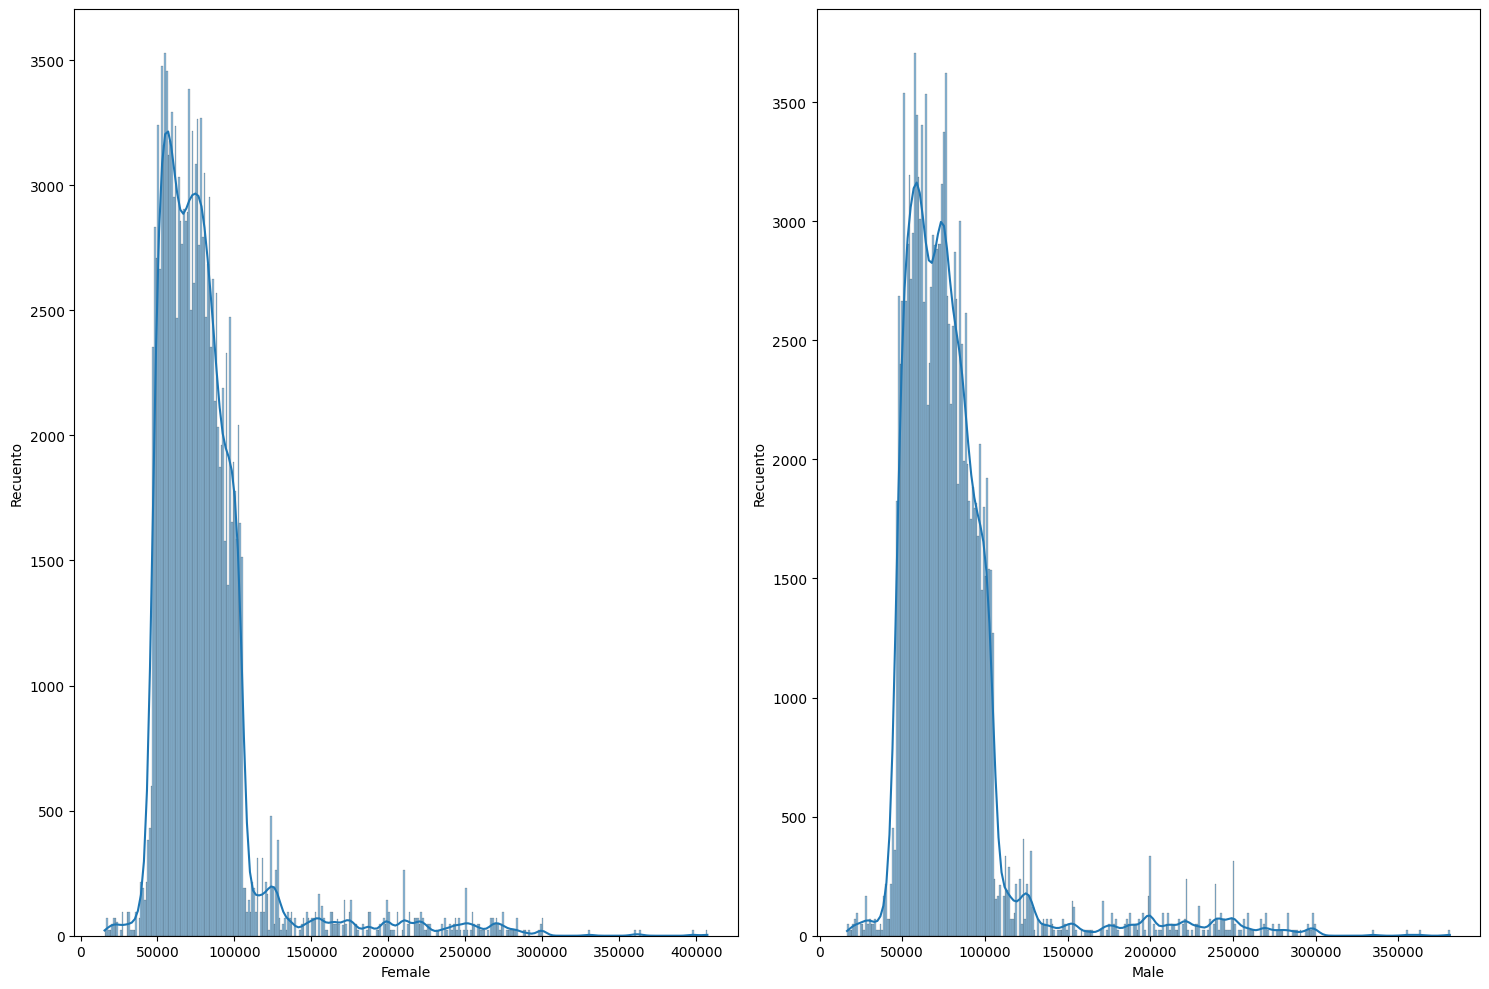

In [17]:
fab.hisplot_grupos(df_test2, "Gender", "Salary")

In [18]:
fab.test_homoceidad(df_test2, "Gender", "Salary")

En la variable Salary las varianzas NO son homogéneas entre grupos.


Aunque a simple vista las medias son practicamente iguales y las distribuciones también, al hacer el test de Mann-Whitney obtenemos un p-valor menor que 0.05 por lo que tenemos suficientes evidencias como para rechazar la hipótesis nula, siendo estadísticamente significativas las diferencias entre los salarios por género. 